In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline 


In [2]:
import seaborn as sns

In [3]:
a = '/Users/macbook/Desktop/DS/Projects_Py_DS/IBM_Hr_analytics/IBM_Attrition_Data.csv'

In [4]:
df = pd.read_csv(a)

In [5]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

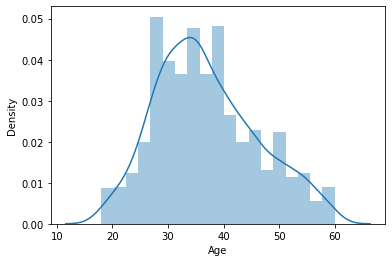

In [14]:
#Age Dsitribution
sns.distplot(df['Age'])

In [7]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [8]:
subdf = df[['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany']]

In [9]:
subdf.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [10]:
#Explore attrition by age 
Attrition_dummies = pd.get_dummies(df['Attrition'], prefix = 'Attrition')

In [11]:
df_with_dummies = pd.concat([subdf, Attrition_dummies], axis = 'columns')

In [54]:
df_with_dummies.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition_Yes
0,41,2,1,2,1,2,4,2,5993,8,1,6,1
1,49,1,8,1,1,3,2,1,5130,1,3,10,0
2,37,1,2,2,4,4,3,2,2090,6,3,0,1
3,33,1,3,4,1,4,3,1,2909,1,3,8,0
4,27,1,2,1,2,1,2,1,3468,9,3,2,0


Text(0, 0.5, 'Age')

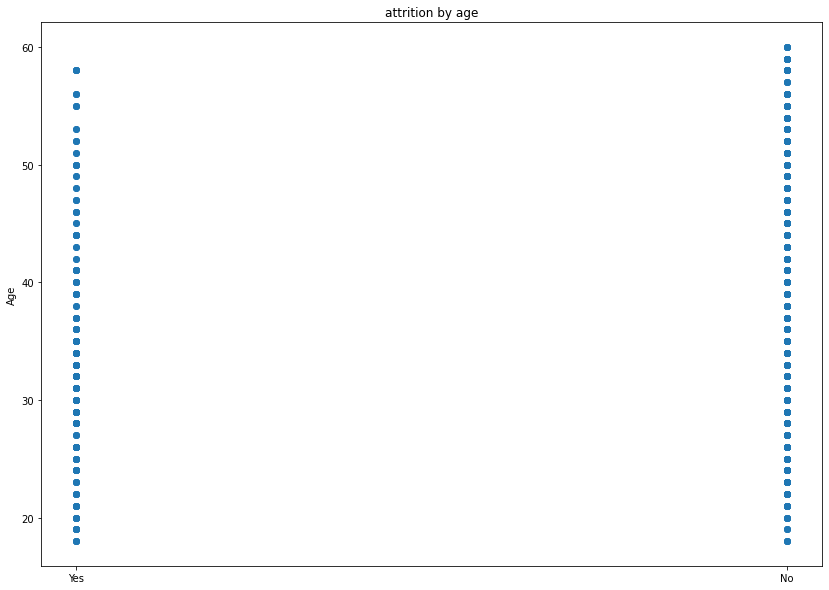

In [18]:
plt.figure(figsize=(14,10))
plt.scatter(df['Attrition'], df['Age'])
plt.title('attrition by age')
plt.ylabel('Age')


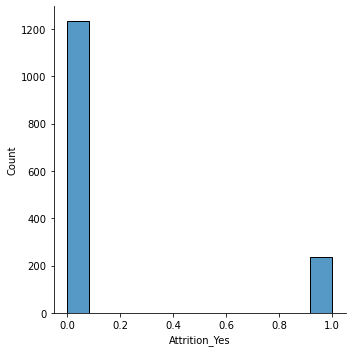

In [31]:
#left employees explored data
sns.displot(df_with_dummies['Attrition_Yes'])

<AxesSubplot:xlabel='EducationField', ylabel='Count'>

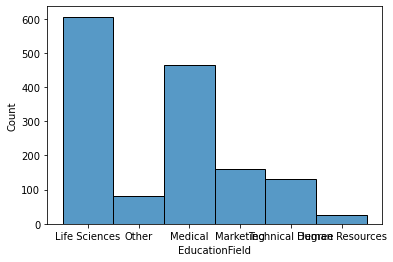

In [44]:
#Explore by education field
sns.histplot(df_with_dummies['EducationField'])

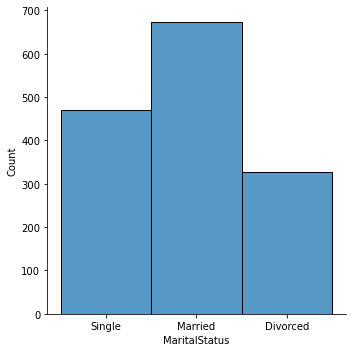

In [43]:
#Bar chart
sns.displot(df_with_dummies['MaritalStatus'])

# Data preprocessing


In [46]:
df_with_dummies['EducationField'].replace('Life Sciences',1, inplace=True)
df_with_dummies['EducationField'].replace('Medical',2, inplace=True)
df_with_dummies['EducationField'].replace('Marketing', 3, inplace=True)
df_with_dummies['EducationField'].replace('Other',4, inplace=True)
df_with_dummies['EducationField'].replace('Technical Degree',5, inplace=True)
df_with_dummies['EducationField'].replace('Human Resources', 6, inplace=True)

In [48]:
df_with_dummies['MaritalStatus'].replace('Married',1, inplace=True)
df_with_dummies['MaritalStatus'].replace('Single',2, inplace=True)
df_with_dummies['MaritalStatus'].replace('Divorced', 3, inplace=True)

In [49]:
df_with_dummies['Department'].replace('Research & Development',1, inplace=True)
df_with_dummies['Department'].replace('Sales',2, inplace=True)
df_with_dummies['Department'].replace('Human Resources', 3, inplace=True)

In [52]:
df_with_dummies.drop(columns = 'Attrition', axis = 'columns', inplace = True)

In [53]:
df_with_dummies.drop(columns = 'Attrition_No', axis = 'columns', inplace = True)

In [55]:
Y = df_with_dummies['Attrition_Yes']

In [56]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition_Yes, dtype: uint8

In [57]:
df_with_dummies.drop(columns = 'Attrition_Yes', axis = 'columns', inplace = True)

In [58]:
X = df_with_dummies

In [59]:
X.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,2,1,2,1,2,4,2,5993,8,1,6
1,49,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,2,2,4,4,3,2,2090,6,3,0
3,33,1,3,4,1,4,3,1,2909,1,3,8
4,27,1,2,1,2,1,2,1,3468,9,3,2


# Logistic Regression


In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
Logis = LogisticRegression()

In [62]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

In [65]:
Logis.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
Logis.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [72]:
x_test

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
498,22,1,6,1,2,1,3,1,2773,0,3,2
230,52,1,2,3,1,3,4,2,3212,7,2,2
777,21,1,10,3,1,3,1,2,1416,1,2,1
994,52,1,28,2,2,4,3,1,13247,2,2,5
917,34,2,2,3,3,3,1,2,4538,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
528,50,2,8,2,5,2,3,1,6796,3,3,4
260,32,1,7,3,1,2,2,1,2794,1,1,5
621,36,2,1,2,1,2,4,1,6201,1,2,18
237,52,2,2,4,1,1,3,2,19068,1,4,33


In [67]:
Logis.score(x_test, y_test)

0.891156462585034

In [68]:
Logis.predict_proba(x_test)

array([[0.78083565, 0.21916435],
       [0.89784639, 0.10215361],
       [0.74035452, 0.25964548],
       [0.93844244, 0.06155756],
       [0.82784912, 0.17215088],
       [0.87107903, 0.12892097],
       [0.91274836, 0.08725164],
       [0.7822651 , 0.2177349 ],
       [0.87140409, 0.12859591],
       [0.90494507, 0.09505493],
       [0.71984473, 0.28015527],
       [0.94629905, 0.05370095],
       [0.63000164, 0.36999836],
       [0.93514344, 0.06485656],
       [0.92702206, 0.07297794],
       [0.90897351, 0.09102649],
       [0.91410706, 0.08589294],
       [0.94392023, 0.05607977],
       [0.78723287, 0.21276713],
       [0.86706619, 0.13293381],
       [0.7956167 , 0.2043833 ],
       [0.81512839, 0.18487161],
       [0.81508417, 0.18491583],
       [0.72511501, 0.27488499],
       [0.93082732, 0.06917268],
       [0.88872285, 0.11127715],
       [0.84660576, 0.15339424],
       [0.9445416 , 0.0554584 ],
       [0.80312946, 0.19687054],
       [0.96423162, 0.03576838],
       [0.